# ２回目
- 学習率を0.05
- epochs（パラメータを探索する回数）を10から20へ

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from skimage import io
from keras import utils
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers

labels= pd.read_csv("train_master.tsv", sep="\t")
master = pd.read_csv("label_master.tsv", sep="\t")
sample = pd.read_csv("sample_submit.csv", header=None, sep=",")

train_images = []
for fname in labels["file_name"]:
    path = "./train/" + fname
    img = io.imread(path)
    train_images.append(img)
train_images = np.array(train_images)
print(type(train_images), train_images.shape)

test_images = []
for fname in sample[0]:
    path = "./test/" + fname
    img = io.imread(path)
    test_images.append(img)
test_images = np.array(test_images )
print(type(test_images ), test_images.shape)

train_images = train_images / 255
test_images = test_images / 255

y = labels["label_id"]

y_categorical = utils.to_categorical(y)
y_categorical

X_con_image, X_ver_image = np.split(train_images, [40000])
y_con_label, y_ver_label = np.split(y_categorical, [40000])

model = Sequential()

model.add(Conv2D(filters=6, kernel_size=(3,3), padding="same", input_shape=(32,32,3)))
model.add(Activation("sigmoid"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=12, kernel_size=(3,3), padding="same"))
model.add(Activation("sigmoid"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=120))
model.add(Activation("sigmoid"))
model.add(Dense(units=60))
model.add(Activation("sigmoid"))
model.add(Dense(units=20))
model.add(Activation("softmax"))

model.compile(loss="categorical_crossentropy",
             optimizer=optimizers.SGD(lr=0.05, momentum=0.9, decay=0.0, nesterov=True), metrics=["accuracy"])

batch_size=100
epochs=25

history = model.fit(X_con_image, y_con_label,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_ver_image, y_ver_label))

Using TensorFlow backend.


<class 'numpy.ndarray'> (50000, 32, 32, 3)
<class 'numpy.ndarray'> (10000, 32, 32, 3)
Train on 40000 samples, validate on 10000 samples
Epoch 1/25
40000/40000 [==============================] - 12s 298us/step - loss: 3.0075 - accuracy: 0.0500 - val_loss: 3.0010 - val_accuracy: 0.0456
Epoch 2/25
40000/40000 [==============================] - 12s 302us/step - loss: 2.9997 - accuracy: 0.0502 - val_loss: 2.9991 - val_accuracy: 0.0521
Epoch 3/25
40000/40000 [==============================] - 12s 295us/step - loss: 2.9980 - accuracy: 0.0494 - val_loss: 2.9976 - val_accuracy: 0.0503
Epoch 4/25
40000/40000 [==============================] - 11s 276us/step - loss: 2.9977 - accuracy: 0.0494 - val_loss: 2.9971 - val_accuracy: 0.0482
Epoch 5/25
40000/40000 [==============================] - 12s 299us/step - loss: 2.9974 - accuracy: 0.0494 - val_loss: 2.9969 - val_accuracy: 0.0507
Epoch 6/25
40000/40000 [==============================] - 12s 307us/step - loss: 2.9972 - accuracy: 0.0485 - val_loss: 

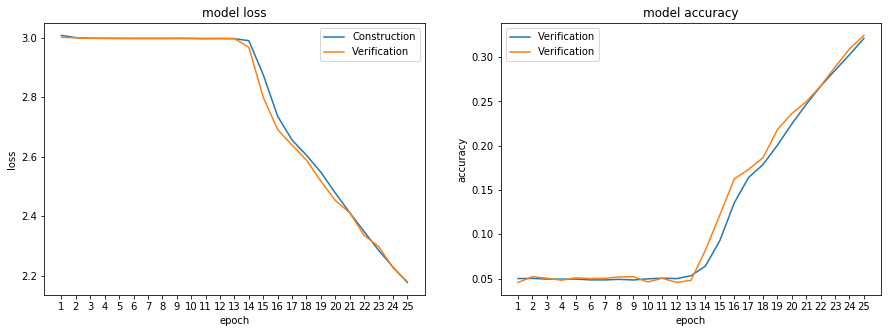

In [8]:
def learning_plot(history, epochs):
    fig = plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.plot(range(1,epochs+1), history.history['loss'])
    plt.plot(range(1,epochs+1), history.history['val_loss'])
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.xticks(range(1,epochs+1))
    plt.ylabel('loss')
    plt.legend(['Construction', 'Verification'], loc='upper right')
    plt.subplot(1,2,2)
    plt.plot(range(1,epochs+1), history.history['accuracy'])
    plt.plot(range(1,epochs+1), history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.xticks(range(1,epochs+1))
    plt.ylabel('accuracy')
    plt.legend(['Verification', 'Verification'], loc='upper left')
    plt.show()    
    
learning_plot(history,epochs)

In [5]:
pred = model.predict(test_images)
pred

array([[0.07151275, 0.05319758, 0.00113054, ..., 0.00552707, 0.08523079,
        0.1195813 ],
       [0.0560459 , 0.08898515, 0.00260421, ..., 0.04907661, 0.06716372,
        0.06629769],
       [0.16411224, 0.04187162, 0.00698641, ..., 0.00561035, 0.05791557,
        0.12247313],
       ...,
       [0.00917385, 0.12037307, 0.20956194, ..., 0.08274722, 0.01057402,
        0.01902161],
       [0.06186721, 0.03793572, 0.00125186, ..., 0.00589374, 0.07875095,
        0.01301639],
       [0.00061804, 0.08263977, 0.41078746, ..., 0.00589166, 0.0191144 ,
        0.00805557]], dtype=float32)

In [6]:
print(model.evaluate(X_ver_image ,y_ver_label))

10000/10000 [==============================] - 1s 129us/step
[2.180106318283081, 0.3244999945163727]


In [7]:
sample[1] = pred
sample.to_csv("submit2_1.csv", sep=",", index=None, header=None)